In [2]:
#1. LOAD THE DATASET

import pandas as pd

df = pd.read_csv('creditcard.csv')

In [4]:
#2. ANALYSE THE DATASET - NUMBER OF ROWS, COLUMNS, DATATYPES, check for null values

print('Number of Rows', df.shape[0])
print('Number of Columns', df.shape[1])
df.info()

Number of Rows 284807
Number of Columns 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

In [6]:
#3 Drop the duplicate rows
df.drop_duplicates(inplace=True)
print('Number of Rows', df.shape[0])
print('Number of Columns', df.shape[1])

Number of Rows 283726
Number of Columns 31


Class
0    283253
1       473
Name: count, dtype: int64


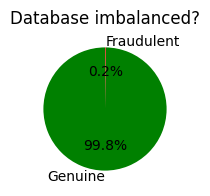

In [12]:
#4 Check if database is imbalanced on target variable (Class)

import matplotlib.pyplot as plt

class_counts = df['Class'].value_counts()
print(class_counts)

labels = ['Genuine', 'Fraudulent']
plt.figure(figsize=(2, 2))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Database imbalanced?')
plt.show()


In [ ]:
#Since dataset is imbalanced, use SMOTE to create a balanced sample

In [14]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.over_sampling import SMOTE
import seaborn as sns

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

plt.figure(figsize=(8, 6))
sns.countplot(y_res, palette='viridis')
plt.title('Distribution After Applying SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Genuine', 'Fraudulent'])
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12788\1485451863.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_res, palette='viridis')


In [5]:
# Scale the amount column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [11]:
#Check if Time and Amount should be dropped
# Feature engineering - correlation and feature importance analysis
correlation_with_class = df.corr()['Class'].sort_values(ascending=False)
print(correlation_with_class)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [46]:
!pip install xgboost

In [13]:
#feature selection with xgboost

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state = 42 )
xgb_model.fit(X_train, y_train)


feature_importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

y_pred = xgb_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_pred))

   Feature  Importance
14     V14    0.285963
7       V7    0.194785
10     V10    0.065364
12     V12    0.048260
4       V4    0.031508
17     V17    0.026058
27     V27    0.025571
1       V1    0.021061
16     V16    0.018698
29  Amount    0.017724
8       V8    0.017520
26     V26    0.016993
24     V24    0.016207
18     V18    0.015367
28     V28    0.015312
3       V3    0.014771
5       V5    0.014239
20     V20    0.013891
6       V6    0.013888
21     V21    0.013262
15     V15    0.013136
0     Time    0.012920
11     V11    0.012653
9       V9    0.012519
13     V13    0.012378
19     V19    0.011898
23     V23    0.011343
2       V2    0.011299
22     V22    0.008552
25     V25    0.006862
Accuracy: 0.9996137776061234


In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1)
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
#consider dropping more features and check accuracy
df3 = df[['V14', 'V7','V10', 'V17', 'V4','Amount', 'Class']]

X = df3.drop('Class', axis=1)
y = df3['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state = 42 )
xgb_model.fit(X_train, y_train)

feature_importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

y_pred = xgb_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_pred))


  Feature  Importance
0     V14    0.464037
1      V7    0.211739
2     V10    0.126227
5  Amount    0.072414
4      V4    0.067412
3     V17    0.058171
Accuracy: 0.9996254813150287
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85299     8]
 [   24   112]]
ROC-AUC: 0.9117178164125557


In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1)
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

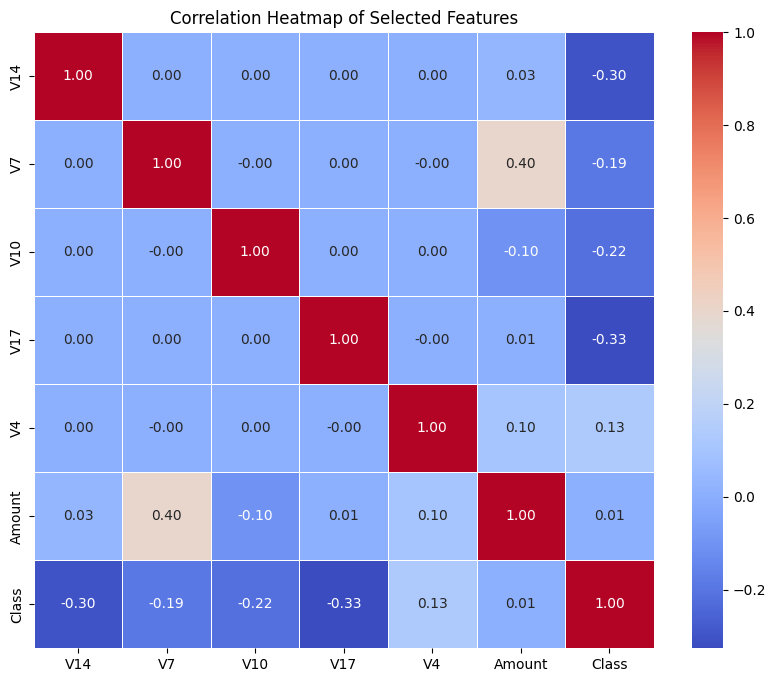

In [23]:
# Correlation matrix
import seaborn as sns
corr_matrix = df3.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [25]:
df3.describe()

,V14,V7,V10,V17,V4,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.207294e-15,-5.556467e-16,2.239053e-15,-3.772171e-16,2.074095e-15,2.913952e-17,0.001727
std,9.585956e-01,1.237094e+00,1.088850e+00,8.493371e-01,1.415869e+00,1.000002e+00,0.041527
min,-1.921433e+01,-4.355724e+01,-2.458826e+01,-2.516280e+01,-5.683171e+00,-3.532294e-01,0.000000
25%,-4.255740e-01,-5.540759e-01,-5.354257e-01,-4.837483e-01,-8.486401e-01,-3.308401e-01,0.000000
50%,5.060132e-02,4.010308e-02,-9.291738e-02,-6.567575e-02,-1.984653e-02,-2.652715e-01,0.000000
75%,4.931498e-01,5.704361e-01,4.539234e-01,3.996750e-01,7.433413e-01,-4.471707e-02,0.000000
max,1.052677e+01,1.205895e+02,2.374514e+01,9.253526e+00,1.687534e+01,1.023622e+02,1.000000


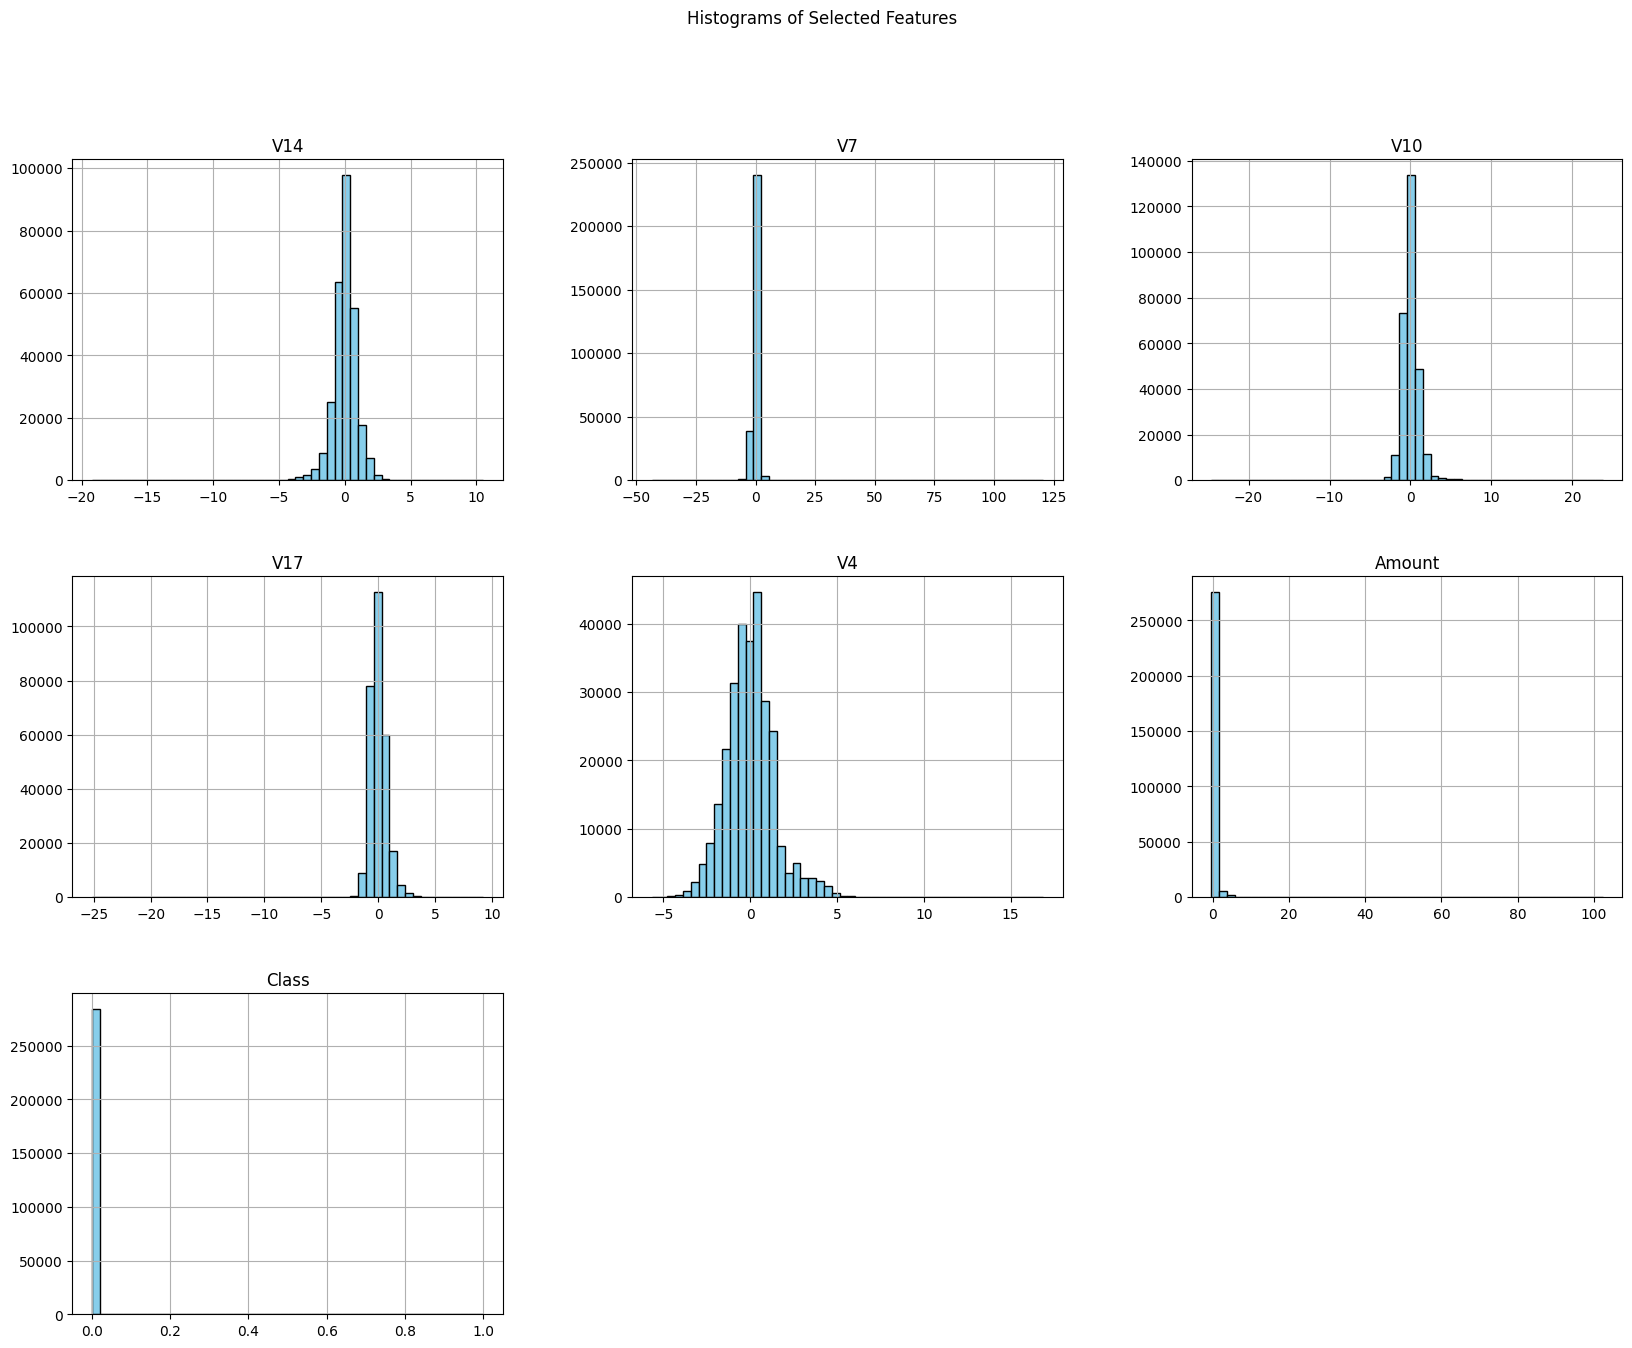

In [27]:
#Histogram of selected features

import matplotlib.pyplot as plt

df3.hist(bins=50, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Selected Features')
plt.show()

In [29]:
df3.skew()

V14       -1.995176
V7         2.553907
V10        1.187141
V17       -3.844914
V4         0.676292
Amount    16.977724
Class     23.997579
dtype: float64

In [31]:
import xgboost as xgb

# Calculate scale_pos_weight
scale_pos_weight = sum(y == 0) / sum(y == 1)

# Initialize and train XGBoost model
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


print('Accuracy:', accuracy_score(y_test, y_pred))

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_pred))



Accuracy: 0.9994616293903538
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.83      0.83       136

    accuracy                           1.00     85443
   macro avg       0.92      0.92      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85284    23]
 [   23   113]]
ROC-AUC: 0.9153063692449211


In [ ]:
#!pip install mljar-supervised

In [58]:
from supervised.automl import AutoML

automl = AutoML()
automl.fit(X_train, y_train)
predictions = automl.predict(X_test)
#print("Best Model:", automl.best_model())
print("Accuracy:", automl.score(X_test, y_test))


Linear algorithm was disabled.
AutoML directory: AutoML_2
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline logloss 0.013084 trained in 1.01 seconds
2_DecisionTree logloss 0.003701 trained in 54.56 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 0.002606 trained in 51.57 seconds
4_Default_NeuralNetwork logloss 0.004845 trained in 59.31 seconds
5_Default_RandomForest logloss 0.003071 trained in 43.23 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.002557 trained in 10.87 seconds
AutoML fit time: 235.8 seconds
AutoML best model: Ensemble
Accuracy: 0.9907540699647719


In [62]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Predict probabilities for ROC-AUC
y_pred_proba = automl.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
[[85284    23]
 [   23   113]]
ROC-AUC Score: 0.9807500625767557


In [64]:
import pickle

# Save the model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(automl, file)

# Later, load the model from the file
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_loaded))


[[84529   778]
 [   12   124]]
